# AirBnb Listing Analysis
### Objective 1 : Data Prep & QA
* Read in the AirBnB Lisiting Data
* Cast any date column as datetime column
* FIlter down the data to just listing in the city of Paris
* QA the Paris listing data : Check for missing values, calculate minimum , maximum and average for each field


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_listing = pd.read_csv("Listings.csv",
                         low_memory=False, 
                         encoding="ISO-8859-1",
                         parse_dates = ["host_since"])
df_listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [4]:
paris_listing = df_listing.query("city == 'Paris'").loc[ : , ["host_since",
                                                              "neighbourhood",
                                                              "city",
                                                              "accommodates",
                                                              "price"]]
paris_listing

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [5]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
paris_listing.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [7]:
paris_listing.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

### Objective 2 : Prepare data for visualization 
* Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
* Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
* Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [8]:
paris_listing_neighbourhood = ( paris_listing.groupby("neighbourhood").agg({"price": "mean"}).sort_values("price"))
paris_listing_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [9]:
paris_listing_accommodation = (
                                paris_listing
                               .query("neighbourhood == 'Elysee'")
                               .groupby("accommodates")
                               .agg({"price": "mean"})
                               .sort_values("price"))
paris_listing_accommodation.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [10]:
paris_listing['year'] = paris_listing['host_since'].dt.year
paris_listing_over_time = (paris_listing.groupby('year')
                          .agg({"neighbourhood" : "count",
                                "price" : "mean"}))
paris_listing_over_time
                               

,neighbourhood,price
year,,
2008.0,4,77.750000
2009.0,106,159.641509
2010.0,416,125.031250
2011.0,1339,124.828230
2012.0,4592,111.578615
2013.0,8142,107.096414
2014.0,10922,100.253800
2015.0,12147,103.646250
2016.0,8871,114.159847


### Objective 3 : Visualize the data and summarize findings
* Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
* Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed.
* Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed.
* Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
* Create a dual axis line chart to show both new hosts and average price over time.


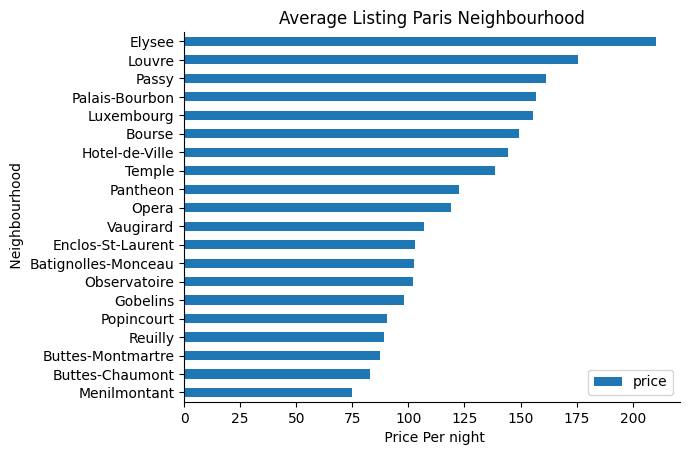

In [13]:
import seaborn as sns

(paris_listing_neighbourhood.plot.barh(
    title = "Average Listing Paris Neighbourhood",
    xlabel = " Price Per night",
    ylabel = " Neighbourhood"
))

sns.despine()

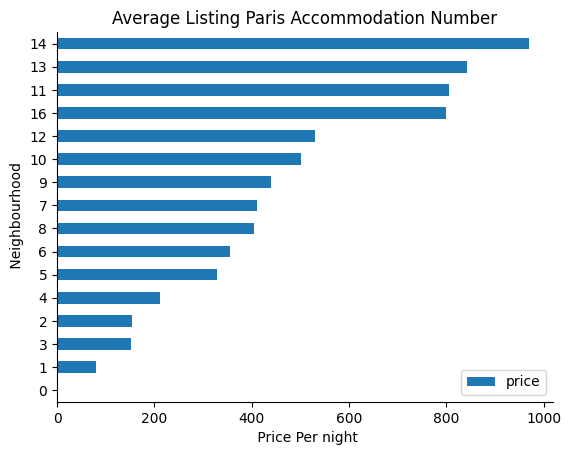

In [15]:


(paris_listing_accommodation.plot.barh(
    title = "Average Listing Paris Accommodation Number",
    xlabel = " Price Per night",
    ylabel = " Neighbourhood"
))

sns.despine()

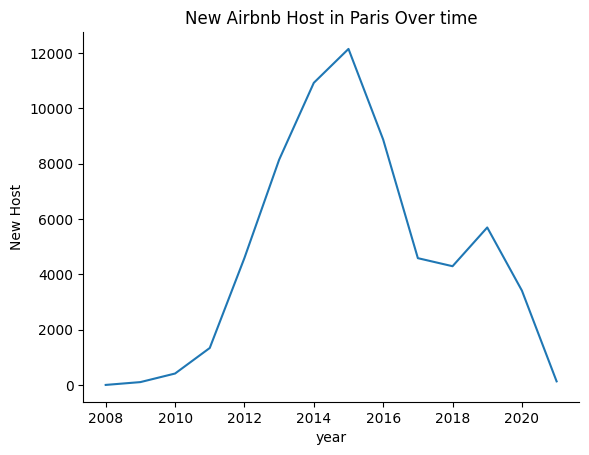

In [18]:
paris_listing_over_time["neighbourhood"].plot(
    ylabel = "New Host",
    title = "New Airbnb Host in Paris Over time"
)
sns.despine()

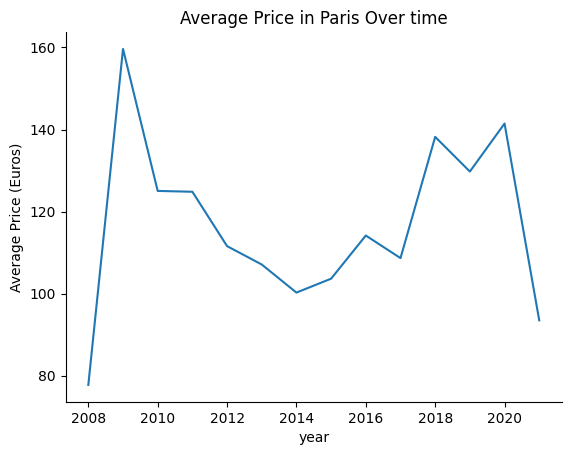

In [19]:
paris_listing_over_time["price"].plot(
    ylabel = "Average Price (Euros)",
    title = "Average Price in Paris Over time"
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations led to Fewer New Hosts , Higher Prices')

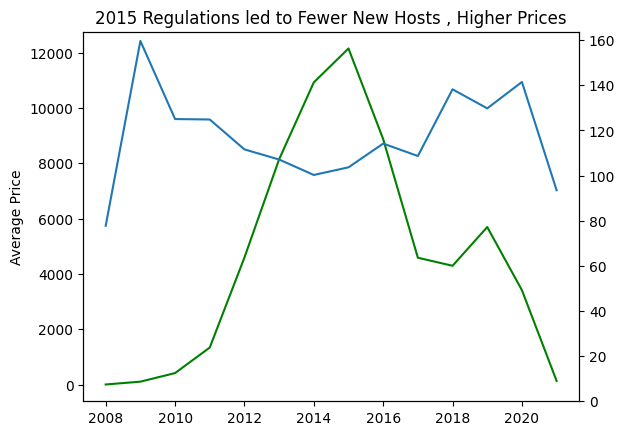

In [32]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.plot(
    paris_listing_over_time.index , 
    paris_listing_over_time["neighbourhood"],
    label = "New Hosts",
    c = "green"
)
ax.set_ylabel("New Hosts")
ax2 = ax.twinx()
ax2.plot(
    paris_listing_over_time.index , 
    paris_listing_over_time["price"],
    label = "Average Price"
)
ax2.set_ylim(0)
ax.set_ylabel("Average Price")
ax.set_title("2015 Regulations led to Fewer New Hosts , Higher Prices")
    
